In [698]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
from sklearn.model_selection import train_test_split

### Data Analysis

In [699]:
data = pd.read_csv('./dataset-classification/heart_failure_clinical_records_dataset.csv')

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [700]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [701]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [702]:
# Number of deaths in the datatset

total_count = data['DEATH_EVENT'].count()
value_count = data['DEATH_EVENT'].value_counts()

total_count, value_count

(np.int64(299),
 DEATH_EVENT
 0    203
 1     96
 Name: count, dtype: int64)

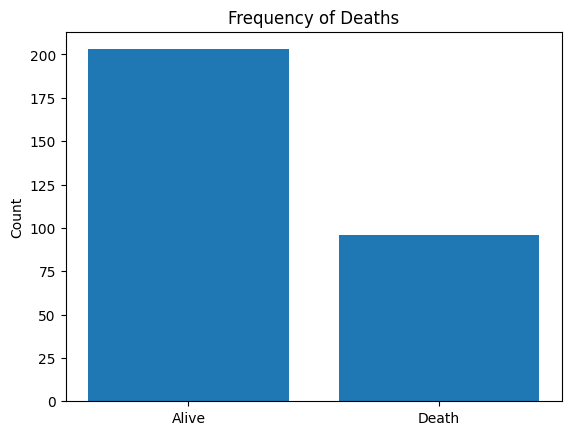

In [703]:
plt.bar(['Alive', 'Death'],[value_count.get(0),value_count.get(1)])
plt.title('Frequency of Deaths')
plt.ylabel('Count')
plt.show()

In [704]:
# Sex Distribution

value_count = data['sex'].value_counts()

value_count

sex
1    194
0    105
Name: count, dtype: int64

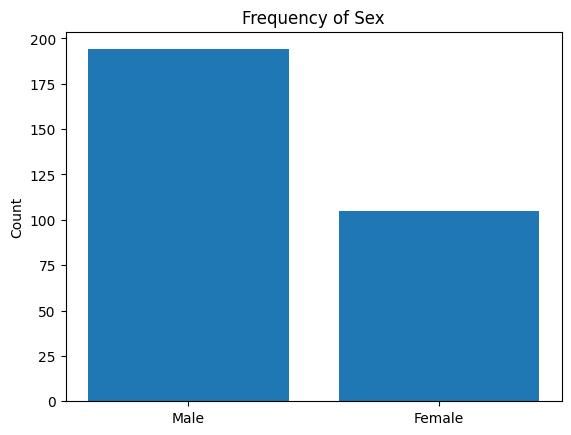

In [705]:
plt.bar(['Male', 'Female'], [value_count.get(1), value_count.get(0)])
plt.title('Frequency of Sex')
plt.ylabel('Count')
plt.show()

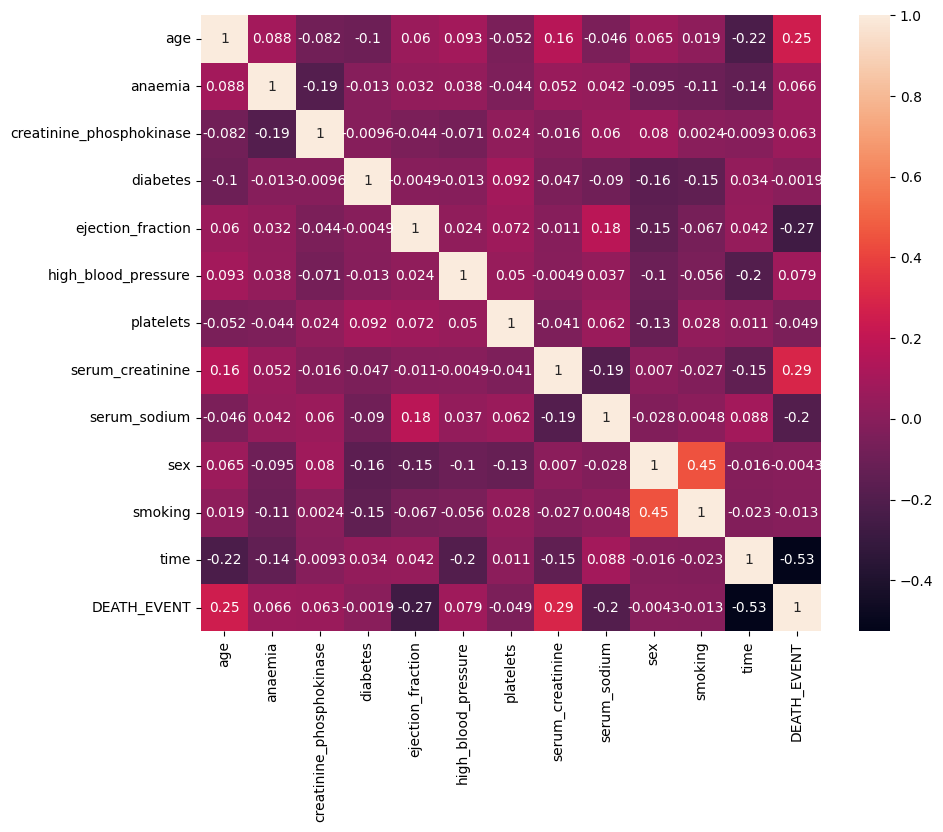

In [706]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

|             Type of CoRelation           | Range|
|---------------------------------|----------|
|Very Weak/Negligible Correlation | \|r\| < 0.1|
|Weak Correlation | 0.1 ≤ \|r\| < 0.3|
|Moderate Correlation | 0.3 ≤ \|r\| < 0.5|
|Strong Correlation| 0.5 ≤ \|r\| < 0.7|
|Very Strong Correlation | \|r\| ≥ 0.7|

### Very Weak/Negligible Correlation:

- diabetes and DEATH_EVENT (-0.0019)
- smoking and DEATH_EVENT (-0.013)
- platelets and DEATH_EVENT (-0.049)
- creatinine_phosphokinase and DEATH_EVENT (0.063)
- sex and DEATH_EVENT (-0.0043)

### Weak Correlation:

- serum_sodium and DEATH_EVENT (-0.2)
- anaemia and DEATH_EVENT (0.066)
- high_blood_pressure and DEATH_EVENT (0.079)

In [707]:
data = data.drop(
    [
        "diabetes",
        "platelets",
        "creatinine_phosphokinase",
        "smoking",
        "sex",
    ],
    axis=1,
)

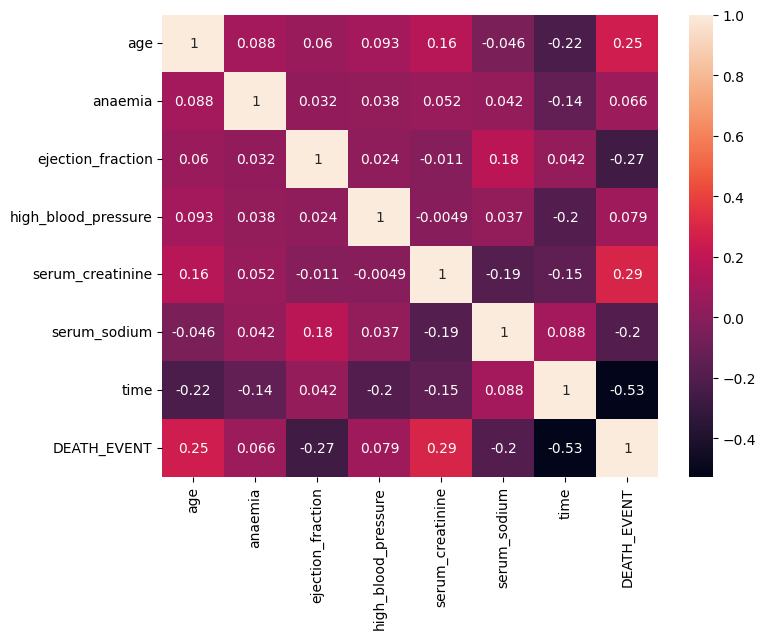

In [708]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Pair Plot

<Figure size 800x600 with 0 Axes>

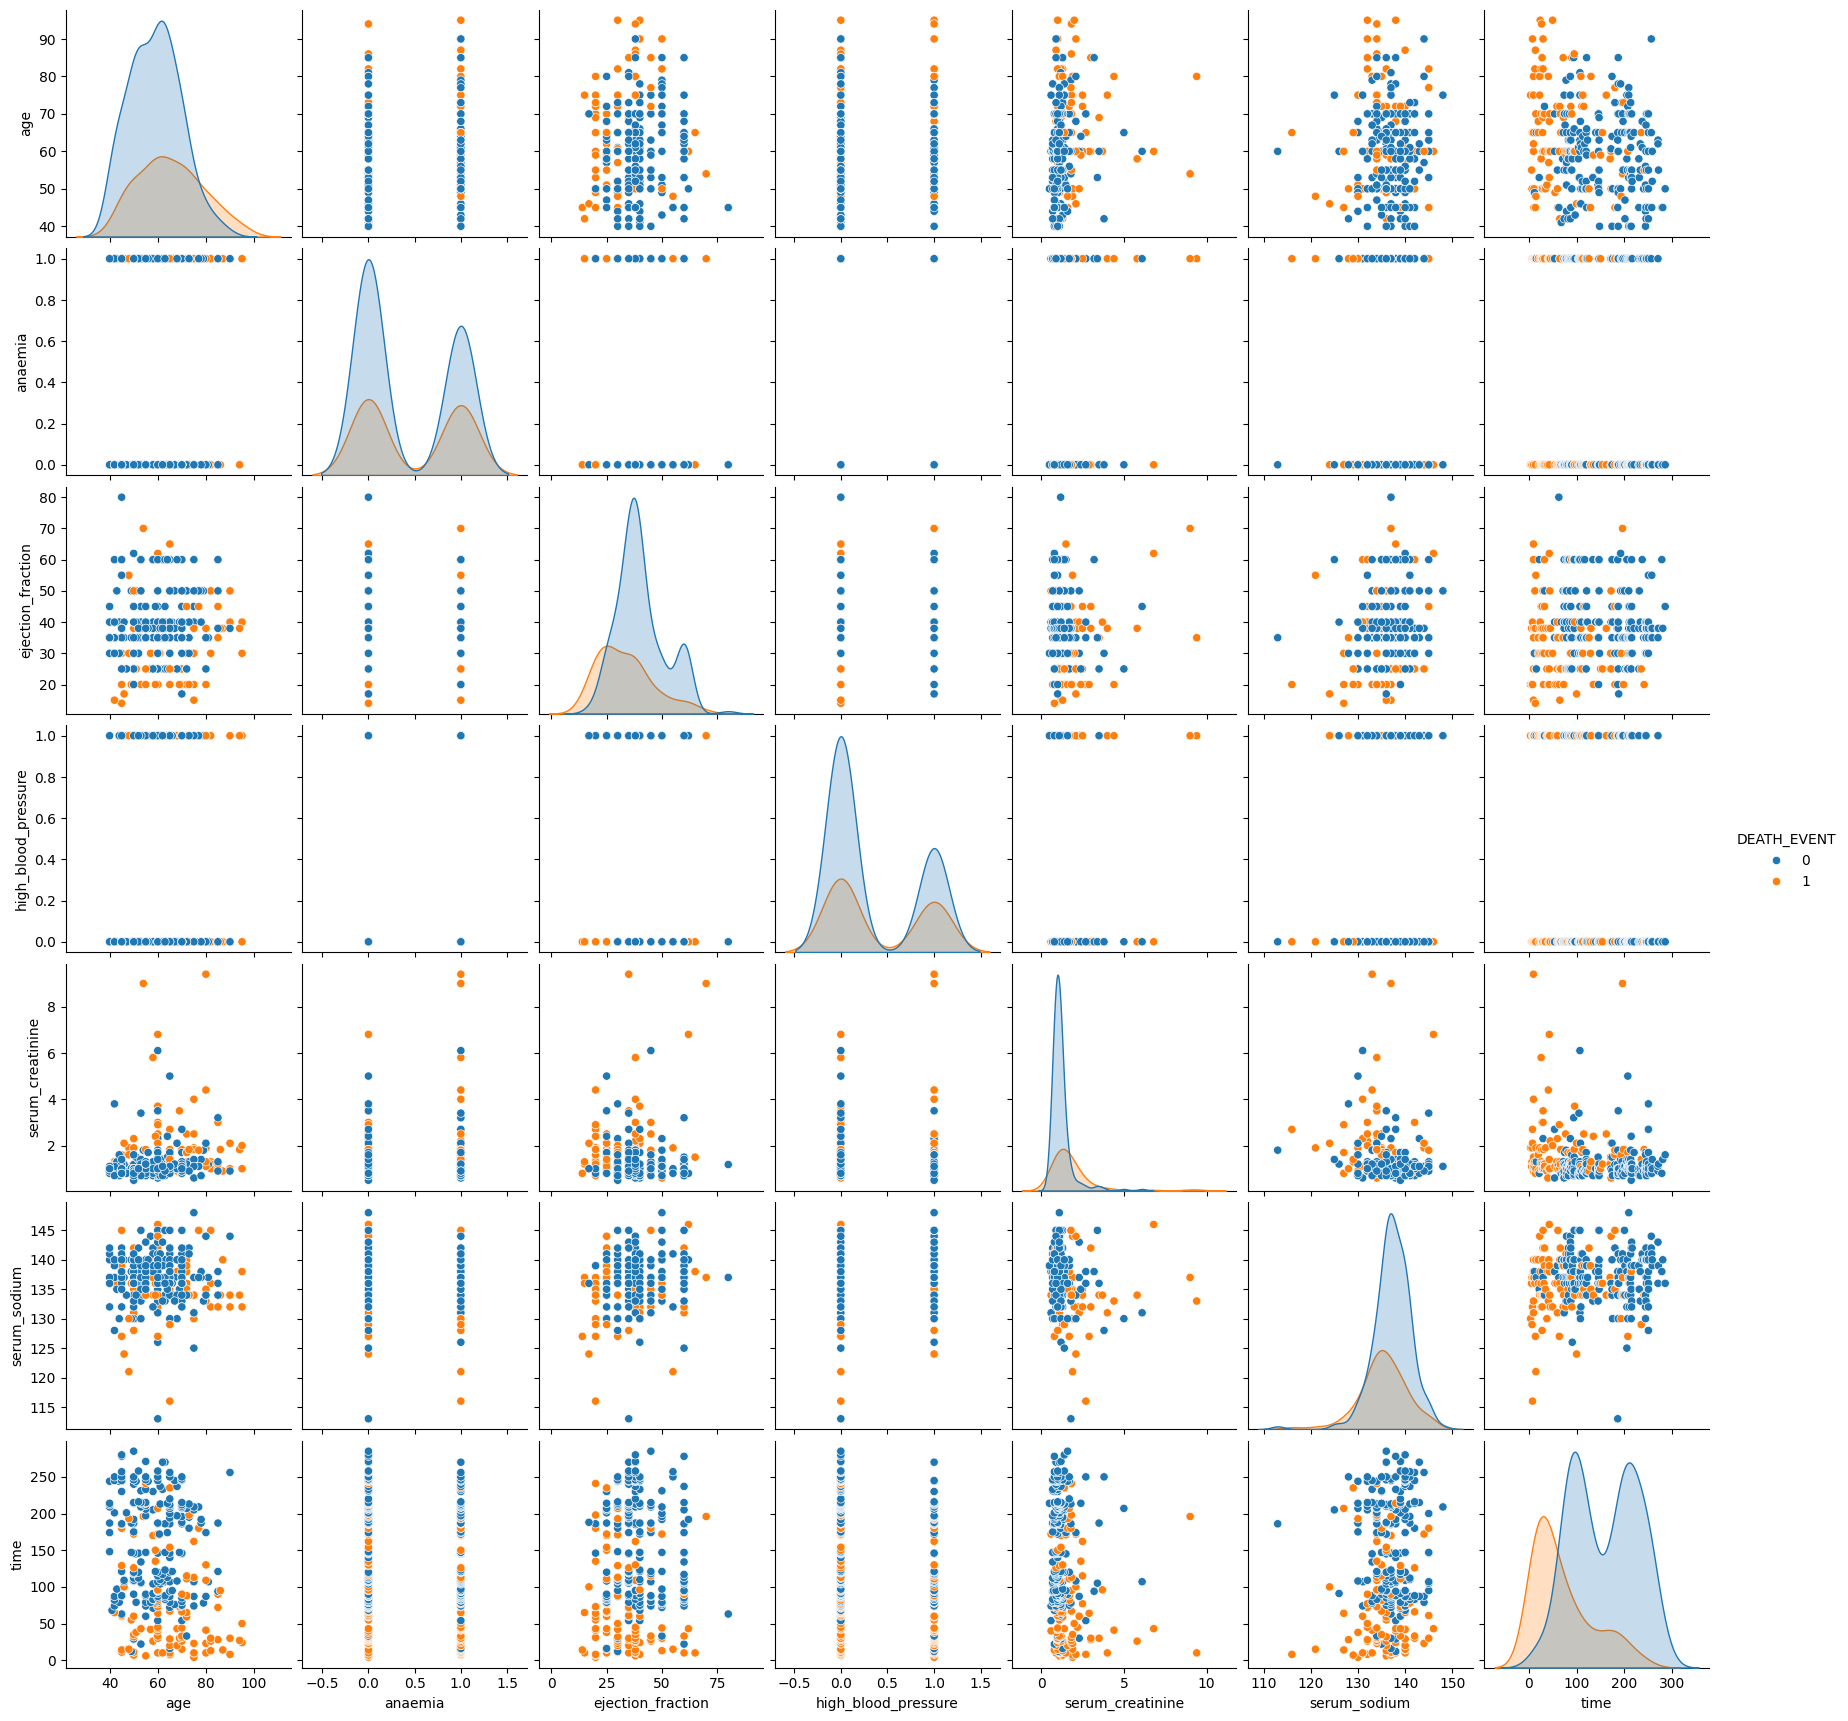

In [709]:
plt.figure(figsize=(8,6))
sns.pairplot(data, hue='DEATH_EVENT')
plt.show()

### Data Preparation

In [710]:
y = data['DEATH_EVENT']
X = data.drop(['DEATH_EVENT'], axis=1)


In [711]:
X.head()

,age,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
0,75.0,0,20,1,1.9,130,4
1,55.0,0,38,0,1.1,136,6
2,65.0,0,20,0,1.3,129,7
3,50.0,1,20,0,1.9,137,7
4,65.0,1,20,0,2.7,116,8


In [712]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [713]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [714]:
len(X_train),len(X_test)

(239, 60)

#### Device Agnostic Code

In [715]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

#### Converting DF to Tensors

In [716]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [717]:
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

In [718]:
X_train.dim(), X_train.size(), y_train.dim(), y_train.size()

(2, torch.Size([239, 7]), 1, torch.Size([239]))

In [719]:
X_test.dim(), X_test.size(), y_test.dim(), y_test.size()

(2, torch.Size([60, 7]), 1, torch.Size([60]))

### Creating Model

In [720]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=7, out_features=12)
        self.layer2 = nn.Linear(in_features=12, out_features=20)
        self.layer3 = nn.Linear(in_features=20, out_features=20)
        self.layer4 = nn.Linear(in_features=20, out_features=12)
        self.layer5 = nn.Linear(in_features=12, out_features=1)

        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer5(self.relu(self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))))

In [721]:
# class MyModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer1 = nn.Linear(in_features=7, out_features=14)
#         self.layer2 = nn.Linear(in_features=14, out_features=14)
#         self.layer3 = nn.Linear(in_features=14, out_features=1)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         return self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))))

In [722]:
model = MyModel().to(device)

model

MyModel(
  (layer1): Linear(in_features=7, out_features=12, bias=True)
  (layer2): Linear(in_features=12, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=20, bias=True)
  (layer4): Linear(in_features=20, out_features=12, bias=True)
  (layer5): Linear(in_features=12, out_features=1, bias=True)
  (relu): ReLU()
)

#### Setup Loss Function and Optimizer

In [723]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model.parameters(), lr=0.0001)

#### Accuracy Function

In [724]:
# def accuracy_fn(y_pred, y_actual):
def accuracy_fn(y_pred, y_actual):
    assert y_pred.shape == y_actual.shape
    correct = torch.eq(y_pred, y_actual).sum().item()
    accuracy = (correct / len(y_actual)) * 100
    return accuracy

### Training the Model

In [725]:
train_loss, train_accu, test_loss, test_accu, epoch_arr = [], [], [], [], []

In [726]:
epochs = 10000

for epoch in range(epochs):
    
    model.train()

    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    accu = accuracy_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        loss_test = loss_fn(test_logits, y_test)
        accu_test = accuracy_fn(test_pred, y_test)
    
    if epoch % 200 == 0:
        train_loss.append(loss.item()) 
        train_accu.append(accu)
        test_loss.append(loss_test.item())
        test_accu.append(accu_test)
        epoch_arr.append(epoch)

        print(f'Epoch: {epoch} | Train Loss: {loss:.2f} | Train Accuracy: {accu:.2f} |Test Loss: {loss_test:.2f} | Test Accuracy: {accu_test:.2f}')

Epoch: 0 | Train Loss: 1.00 | Train Accuracy: 25.52 |Test Loss: 1.04 | Test Accuracy: 26.67
Epoch: 200 | Train Loss: 0.69 | Train Accuracy: 67.78 |Test Loss: 0.71 | Test Accuracy: 68.33
Epoch: 400 | Train Loss: 0.65 | Train Accuracy: 67.78 |Test Loss: 0.66 | Test Accuracy: 68.33
Epoch: 600 | Train Loss: 0.63 | Train Accuracy: 67.78 |Test Loss: 0.63 | Test Accuracy: 68.33
Epoch: 800 | Train Loss: 0.61 | Train Accuracy: 67.78 |Test Loss: 0.60 | Test Accuracy: 68.33
Epoch: 1000 | Train Loss: 0.60 | Train Accuracy: 67.78 |Test Loss: 0.58 | Test Accuracy: 68.33
Epoch: 1200 | Train Loss: 0.58 | Train Accuracy: 67.78 |Test Loss: 0.56 | Test Accuracy: 68.33
Epoch: 1400 | Train Loss: 0.57 | Train Accuracy: 67.78 |Test Loss: 0.54 | Test Accuracy: 68.33
Epoch: 1600 | Train Loss: 0.57 | Train Accuracy: 67.78 |Test Loss: 0.53 | Test Accuracy: 68.33
Epoch: 1800 | Train Loss: 0.56 | Train Accuracy: 67.78 |Test Loss: 0.52 | Test Accuracy: 68.33
Epoch: 2000 | Train Loss: 0.56 | Train Accuracy: 67.78 |T

In [727]:
def plot_side_by_side(epochs, loss, accuracy, label_train_test):
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Plot on the first subplot (left)
    ax[0].plot(epochs, loss, label='Loss', color='blue')
    ax[0].set_title(f'{label_train_test} Loss Over Epochs')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # Plot on the second subplot (right)
    ax[1].plot(epochs, accuracy, label='Accuracy', color='red')
    ax[1].set_title(f'{label_train_test} Accuracy Over Epochs')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

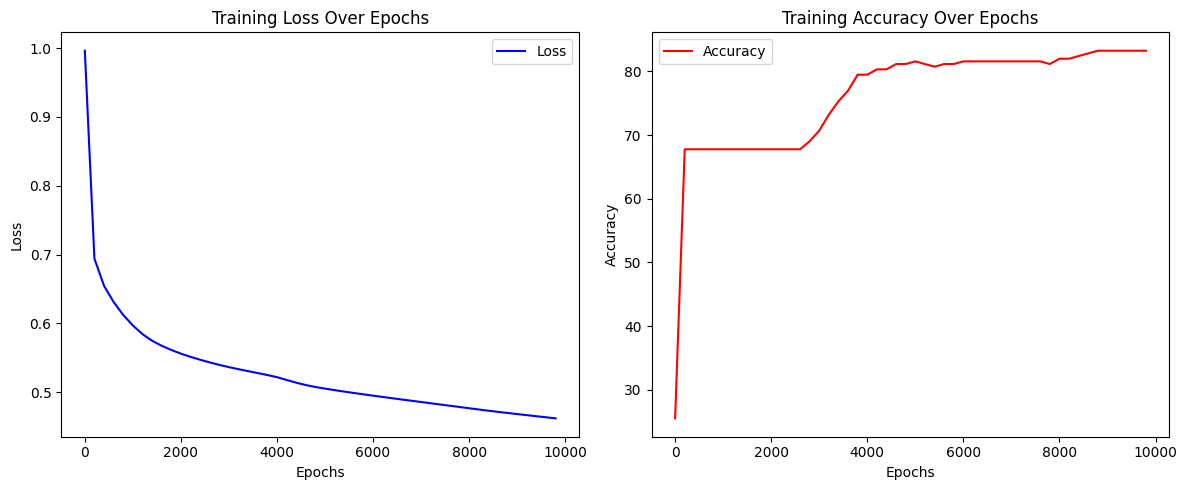

In [728]:
plot_side_by_side(epoch_arr, train_loss, train_accu, "Training")

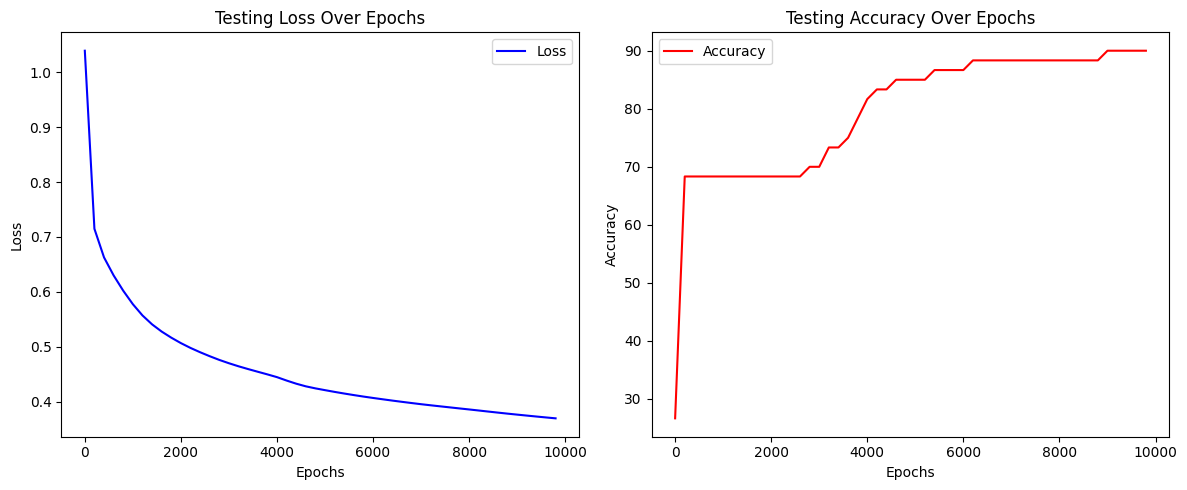

In [729]:
plot_side_by_side(epoch_arr, test_loss, test_accu, "Testing")

In [730]:
with torch.inference_mode():
    model.eval()
    y_logits = model(X_test).squeeze()
    y_predict = torch.round(torch.sigmoid(y_logits))


In [732]:
accuracy = accuracy_fn(y_predict, y_test)

print(f'accuracy of the model is {accuracy:.2f}%')

accuracy of the model is 90.00%
